**Riley Payung**

**CDS 292**

**04/30/2020**

**Assignment 10**

#### Imports

In [1]:
import networkx as netx
import matplotlib.pyplot as plt

#### Question 8

In [2]:
# Load watergate network:
WG = netx.Graph();

watergateFile = open('watergate-testimony-links.dat','r');
for line in watergateFile:
    cLine = line.strip();
    items = cLine.split();
    WG.add_edge(items[0],items[1]);
    

In [3]:
tris = netx.triangles(WG)
print(tris)
# Person involved in the most number of triangles:
max(tris)

{'Baldwin': 3, 'Hunt(H)': 8, 'Liddy': 8, 'McCord': 11, 'Sturgis': 0, 'Dean': 8, 'Barker': 0, 'Ehrlichman': 0, 'Gray': 0, 'Haldeman': 1, 'Kalmbach': 0, 'LaRue': 1, 'Martinez': 0, 'Nixon': 1, 'Colson': 1, 'Oâ€™Brien': 0, 'Parkinson': 1, 'Krogh': 1, 'Magruder': 6, 'Mitchell': 1, 'Porter': 0, 'Strachan': 0, 'Segretti': 0, 'Chapin': 0}


'Sturgis'

In [4]:
A = netx.adjacency_matrix(WG);
A2 = A*A;
A3 = A*A*A;

vshape = [];
tris = [];

In [5]:
for i in range(len(A2.toarray())):
    for j in range(len(A2.toarray())):
        if (j == i + 1):
            vshape.append(A2[i,j]);

In [6]:
for i in range(len(A3.toarray())):
    for j in range(len(A3.toarray())):
        if (i == j):
            tris.append(A3[i,j]);

In [7]:
totalV = sum(vshape);
totalT = sum(tris);
cluster = (1/2) * (totalT / totalV);
cluster

2.04

In [8]:
localcluster = {};
for i in WG.nodes():
    degree = WG.degree(i);
    if (not ((degree - 1) == 0)):
        clustercoeff = totalT / (degree * (degree-1));
        localcluster[i] = clustercoeff;

In [9]:
m = 1000;
p = None;
for i,j in zip(localcluster.keys(),localcluster.values()):
    if (m > int(j)):
        m = int(j);
        p = i;

In [10]:
# person with the greatest clustering. (lowest clustering coefficient, meaning high degree)
print(p)

Dean


#### Question 9

In [11]:
# Load coauthor network
CO = netx.Graph();

coauthorFile = open('coauthor.txt','r');
for line in coauthorFile:
    cLine = line.strip();
    items = cLine.split();
    CO.add_edge(items[0],items[1]);

In [12]:
degrees = [];
for i in CO.nodes():
    degree = CO.degree(i);
    degrees.append(degree);
    
degreehist = {};
for i in degrees:
    if i in degreehist.keys():
        degreehist[i] += 1;
    else:
        degreehist[i] = 1;
    

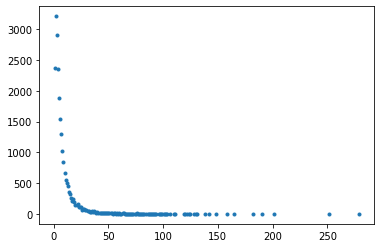

In [13]:
plt.plot(list(degreehist.keys()),list(degreehist.values()), marker='.', linewidth=0.0);
plt.show();

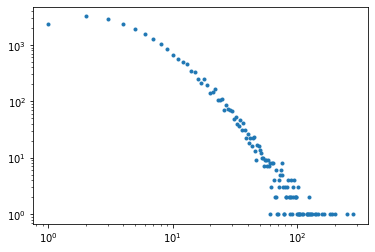

In [14]:
plt.plot(list(degreehist.keys()),list(degreehist.values()), marker='.', linewidth=0.0);
plt.xscale('log');
plt.yscale('log');
plt.show();

#### Question 11

In [15]:
def GetTriangles(G):
    t ={} # Count of triangles per node
    for node in G.nodes():
        t [node]=0 # Initialize triangle count
        neighs = list(G.neighbors(node))
        k = G.degree(node) # Length of neighs
        for c1 in range(k):
            i = neighs[c1]
            for c2 in range(c1+1,k):
                j = neighs[c2]
                if G.has_edge(i,j):
                    t[node]= t[node]+1;
    return t;

In [16]:
tris = GetTriangles(CO);

In [17]:
def factorial(n):
    res = 1;
    for i in range(n,1,-1):
        res *= n;
    return res;

def choose(a,b):
    return (factorial(a) / (factorial(b) * factorial(a-b)));

In [18]:
ci = [];
for i in CO.nodes():
    degree = CO.degree(i);
    if not(degree == 0):
        ci.append(tris[i] / (choose(degree,2)));

In [19]:
n = len(ci);
avg = sum(ci) / n;
avg

0.30287085709054734

It does not match

#### Question 12

In [20]:
avgk = 2 * len(CO.edges()) / len(CO.nodes());
avgk = round(avgk);

avgT = round((avgk * (avgk-1)) / 2 * 0.63);
print(avgT)
n = len(CO.nodes());
m = len(CO.edges());
density = m / (n * (n-1) / 2);
print(density)

18
0.00034923119987489135


#### Question 14

It says that there are approx 2540 global triangles per node, so we can say that there are about:

In [21]:
n * 2540

58757820

58,757,820 global triangles in the network.

#### Question 16

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]


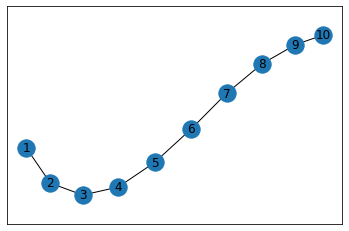

In [35]:
# Line Network of 10 Nodes:
Line = netx.Graph();
N=10;
for i in range(1,N):
    if (i + 1 <= N):
        Line.add_edge(i, i+1);
        
print(Line.edges())
netx.draw_networkx(Line)
plt.show()

In [23]:
# Calculate the number of V-Shapes:

vshapes = 0;

for i in Line.nodes():
    degree = Line.degree(i);
    vshapes += choose(degree,2);
print(vshapes)

9.0


[(1, 2), (1, 10), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]


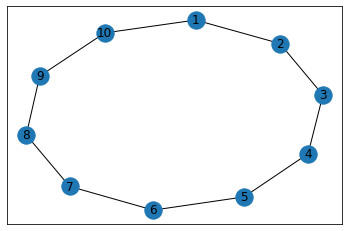

In [24]:
# Ring Network of 10 Nodes:
Ring = netx.Graph();
N=10;
for i in range(1,N):
    if (i + 1 <= N):
        Ring.add_edge(i, i+1);
Ring.add_edge(1,10);
print(Ring.edges())
netx.draw_networkx(Ring)
plt.show()

In [25]:
# Calculate the number of V-Shapes:

vshapes = 0;

for i in Ring.nodes():
    degree = Ring.degree(i);
    vshapes += choose(degree,2);
print(vshapes)

10.0


They are nearly the same because a ring network is just a line network with a link from the last node to the first node, allowing for an additional v-shape in the network.
#### Question 17

In [26]:
u = 10;
v = 15;

lattice = netx.Graph();

for i in range(1,u):
    for j in range(1,v):
        lattice.add_edge((i,j),(i+1,j+1)); # diagonals.
        lattice.add_edge((i,j),(i,j+1)); # horizontals
        lattice.add_edge((i,j),(i+1,j)); # verticals
for i in range(1,u):
    lattice.add_edge((i,v),(i+1,v));
for i in range(1,v):
    lattice.add_edge((u,i),(u,i+1));

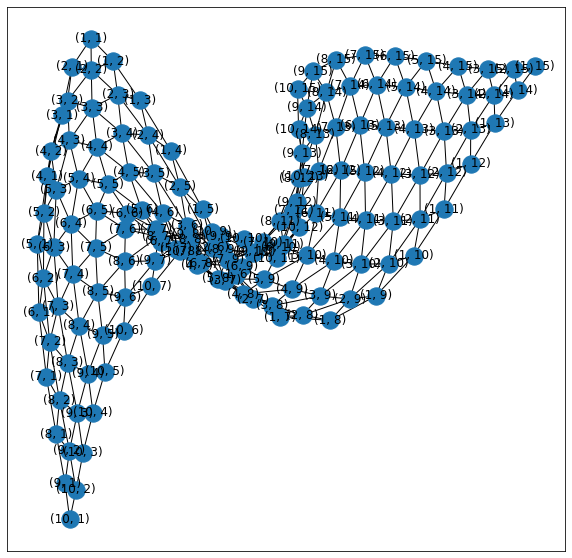

In [27]:
plt.figure(figsize=(10,10))
netx.draw_networkx(lattice)
plt.show()

In [28]:
A = netx.adjacency_matrix(lattice)

In [29]:
A2 = A*A
vshape = [];

In [30]:
for i in range(len(A2.toarray())):
    for j in range(len(A2.toarray())):
        if (j == i + 1):
            vshape.append(A2[i,j]);

In [31]:
sum(vshape)

259

There are 259 local v-shapes in the lattice network.

In [32]:
A3 = A*A*A
tris = [];

In [33]:
for i in range(len(A3.toarray())):
    tris.append(A3[i,i]);

In [34]:
sum(tris)/2

756.0

There are 756 local triangles in the lattice network.